## COVID-19 분석하기

**출처: https://korbillgates.tistory.com/225**

# 1. 분석 준비하기

In [ ]:
# 분석 모듈 설치하기
### 주의할 점 반드시 '!' 맨 앞에 써야 합니다.
!pip install biopython

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [ ]:
import Bio

In [ ]:
Bio.__version__

'1.77'

In [ ]:
# 간단히 테스트해보기
## 바이오파이썬 라이브러리 불러오기
from Bio.Seq import Seq

In [ ]:
## 실행을 시키고 아무런 메시지가 없으면 잘 설치되었다는 뜻이고 이제 바이오파이썬을 사용할 수 있다는 의미입니다.
my_seq = Seq("AGTACACTGGT")

my_seq  ### 팁: 'my_'까지 치고 관련 내용이 나옵니다. tap키를 누르면 자동으로 입력됩니다.

Seq('AGTACACTGGT')

[3]에서 한 작업은 my_seq라는 이름으로 Seq 객체를 만들어 보는 과정입니다.
한 가지만 더 해볼까요?
DNA 작업에서 많이 하는 것이 상보적 서열을 구하는 일이죠.
그럼 이제 상보적 서열을 구해보도록 하겠습니다.


In [ ]:
#상보적 서열(complementary sequence) 찾기
my_seq.complement()

Seq('TCATGTGACCA')

## 1-1. 파일 업로드하기

컴퓨터에 있는 파일을 구글 colab 클라우드 저장소에 업로드한 후 다양한 분석에 이용하기 위해서는 반드시 익혀두어야 하는 기능입니다.


*출처 : https://brunch.co.kr/@jayden-factory/18*


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yonguija.txt to yonguija.txt


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "통합 문서1.csv" with length 204 bytes


## 1-2. 파일 파싱: 데이터에서 필요한 부분을 추출하는 작업

생물정보학에서 다루는 파일은 대표적으로 FASTA 파일과 GenBank 파일이 있습니다. 이 두 가지 파일을 다루는 법을 간단히 살펴보도록 하겠습니다.




** 가. FASTA 파싱하기**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ls_orchid.fasta to ls_orchid.fasta


In [ ]:
from Bio import SeqIO

for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
  print(seq_record.id)
  print(repr(seq_record.seq))
  print(len(seq_record))

**나. GenBank 파싱하기**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ls_orchid.gbk to ls_orchid.gbk


In [ ]:
for seq_record_1 in SeqIO.parse("ls_orchid.gbk", "genbank"):
  print(seq_record_1.id)
  print(repr(seq_record_1.seq))
  print(len(seq_record_1))

## 1-3. Weblogo 그리기


# 2. 실전 도전: 코로나 바이러스-19 (COVID-19) 서열 분석

## 2-1. GenBank에서 데이터 얻어오기

In [ ]:
from Bio import Entrez
Entrez.email = 'domaman@guri.hs.kr'
handle = Entrez.esearch(db='pubmed', term='machine learning')
record = Entrez.read(handle)
print('Pubmed에 machine learning를 검색하면 총 {}개의 결과'.format(record['Count']))

Pubmed에 machine learning를 검색하면 총 44227개의 결과


In [ ]:
print(record)

{'Count': '44227', 'RetMax': '20', 'RetStart': '0', 'IdList': ['32674074', '32674042', '32674041', '32674040', '32673954', '32673953', '32673933', '32673847', '32673788', '32673562', '32673475', '32673431', '32673383', '32673381', '32673380', '32673377', '32673258', '32673256', '32673247', '32673244'], 'TranslationSet': [{'From': 'machine learning', 'To': '"machine learning"[MeSH Terms] OR ("machine"[All Fields] AND "learning"[All Fields]) OR "machine learning"[All Fields]'}], 'TranslationStack': [{'Term': '"machine learning"[MeSH Terms]', 'Field': 'MeSH Terms', 'Count': '18895', 'Explode': 'Y'}, {'Term': '"machine"[All Fields]', 'Field': 'All Fields', 'Count': '94868', 'Explode': 'N'}, {'Term': '"learning"[All Fields]', 'Field': 'All Fields', 'Count': '404324', 'Explode': 'N'}, 'AND', 'GROUP', 'OR', {'Term': '"machine learning"[All Fields]', 'Field': 'All Fields', 'Count': '35136', 'Explode': 'N'}, 'OR', 'GROUP'], 'QueryTranslation': '"machine learning"[MeSH Terms] OR ("machine"[All F

In [ ]:
from Bio import Entrez

def fetch_record(genbank_id):
    Entrez.email = "your_email@email.com"
    handle = Entrez.efetch(db="nucleotide", id=genbank_id, \
                           rettype="gb", retmode="xml")
    records = Entrez.read(handle)
    return records

def get_sequence(records):
    return records[0]["GBSeq_sequence"]

genbank_id = "MN908947"
records = fetch_record(genbank_id)
sequence = get_sequence(records)

print(len(sequence))
print(sequence)

29903
attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgtagatctgttctctaaacgaactttaaaatctgtgtggctgtcactcggctgcatgcttagtgcactcacgcagtataattaataactaattactgtcgttgacaggacacgagtaactcgtctatcttctgcaggctgcttacggtttcgtccgtgttgcagccgatcatcagcacatctaggtttcgtccgggtgtgaccgaaaggtaagatggagagccttgtccctggtttcaacgagaaaacacacgtccaactcagtttgcctgttttacaggttcgcgacgtgctcgtacgtggctttggagactccgtggaggaggtcttatcagaggcacgtcaacatcttaaagatggcacttgtggcttagtagaagttgaaaaaggcgttttgcctcaacttgaacagccctatgtgttcatcaaacgttcggatgctcgaactgcacctcatggtcatgttatggttgagctggtagcagaactcgaaggcattcagtacggtcgtagtggtgagacacttggtgtccttgtccctcatgtgggcgaaataccagtggcttaccgcaaggttcttcttcgtaagaacggtaataaaggagctggtggccatagttacggcgccgatctaaagtcatttgacttaggcgacgagcttggcactgatccttatgaagattttcaagaaaactggaacactaaacatagcagtggtgttacccgtgaactcatgcgtgagcttaacggaggggcatacactcgctatgtcgataacaacttctgtggccctgatggctaccctcttgagtgcattaaagaccttctagcacgtgctggtaaagcttcatgcactttgtccgaacaactggactttattgacactaagaggggtgtatactgctgccgtgaacatgagcatgaaattgcttggtacacggaa

In [8]:
from google.colab import files
uploaded = files.upload()

from Bio import Entrez
from Bio import SeqIO
import pandas as pd

def fetch_record(genbank_id):
    Entrez.email = "domaman@guri.hs.kr"
    handle = Entrez.efetch(db="nucleotide", id=genbank_id, \
                           rettype="gb", retmode="xml")
    records = Entrez.read(handle)
    return records

def write_sequence(genbank_id, records):
    print("## processing: "+genbank_id)
    record_id = records[0]["GBSeq_accession-version"]
    record_desc = records[0]["GBSeq_definition"]
    record_seq = records[0]["GBSeq_sequence"]
    with open(genbank_id+".fasta",'w') as fw:
        fw.write(">"+record_id+" "+record_desc+"\n")
        fw.write(record_seq)

def read_table(file):
    df = pd.read_csv(file, sep="\t")
    return df

file = "COVID-19.ncbi_list.200719.txt"
df = read_table(file)
complete_df = df[df["Gene Region"]=="complete"]
genbank_id_list = complete_df["GenBank"]

genbank_id_list = complete_df["GenBank"]
for genbank_id in genbank_id_list:
    records = fetch_record(genbank_id)
    write_sequence(genbank_id, records)

## processing: MN908947
## processing: LR757995
## processing: LR757996
## processing: MN938384
## processing: MN988668
## processing: MN988669
## processing: MN996529
## processing: MN996530
## processing: MT039873
## processing: MT039890
## processing: MT044257
## processing: MT044258
## processing: MT066176
## processing: MT072688
## processing: MT093571


In [10]:
# 가져오기한 파스타 파일을 하나로 합치기
#외부 리눅스 명령어인 cat파일을 이용하여 하나로 합침
!cat *.fasta > covid.all.fasta

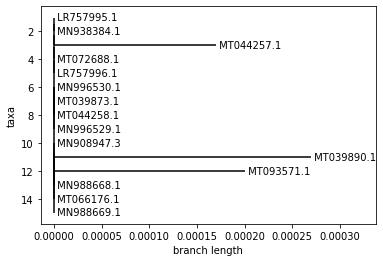

In [13]:
# draw_tree.py

from Bio import Phylo

tree = Phylo.read("covid.all.ph","newick")
Phylo.draw(tree)